In [22]:
%matplotlib inline

# 금융 통계학 기본 03 – 확률분포

<img width="320" src="http://goo.gl/Hphovm">

####  이승준 2016 (c) fb.com/plusjune

# 히스토그램

* 요약통계 (Summary statistics): 데이터 집합의 특징을 값으로 표현
* 도수분포표 (Frequency table): 데이터의 "분포"를 나타낸 표
* 히소토그램 (Histogram): 도수분포표를 차트로 표현

요약통계(Summary statistics)는 데이터 집합의 특징을 간결하게 표현해 주지만, 데이터 집합을 정확하게 해석하기 힘들다. 데이터 집합 전체를 제대로 이해하기 위해서는 데이터가 어떤 모습으로 흩어져있는지 살펴볼 필요가 있다. 즉 데이터가 어떻게 "분포"되어 있는지 살펴볼 필요가 있다. 가장 대표적인 것이 "도수분포표"이며, 이를 차트로 표현한 것이 "히스토그램".

# 데이터의 개수 세기
가장 기본적이면서 실제로 가장 많이 사용되는 데이터 분석
* 파이썬 딕셔너리 
* dict.get(key, default) 메소드

파이썬에서 데이터의 개수를 세는 가장 간단한 방법은 딕셔너리(dict)를 사용하는 것이다. 

```python
dict.get(key, default=None)
```
파이썬 dict.get(key, default) 메소드는 키(key)에 해당하는 값을 반환하며 키(key)가 존재하지 않으면 n을 반환한다.

참고) http://tutorialspoint.com/python/dictionary_get.htm

In [8]:
import numpy as np

data = np.random.randint(0, 10, 50)
freq_tab = {}
for x in data:
    freq_tab[x] = freq_tab.get(x, 0) + 1

print(freq_tab)

{0: 7, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7, 6: 7, 7: 1, 8: 6, 9: 6}


# 히스토그램 만들기
* 계산된 freq_tab 가 바로 도수분포표
* 0~9까지 각 값의 빈도(frequency)를 갖는다.
* 각 빈도값을 전체 데이터 개수로 나누어 주면 각 값이 발생하는 확률

In [ ]:
구간을 나누고, 각 구간에 존재하는 데이터의 개수를 세는 것(히스토그램)은 가장 많은 데이터 분석 방법이다.

In [16]:
print('도수분포: ', freq_tab)
print('=' * 50)

n = len(data) # 데이터의 개수
p = {}
for i, freq in freq_tab.items():
 p[i] = freq / n

print ('발생확률: ', p)

도수분포:  {0: 7, 1: 4, 2: 3, 3: 5, 4: 4, 5: 7, 6: 7, 7: 1, 8: 6, 9: 6}
발생확률:  {0: 0.14, 1: 0.08, 2: 0.06, 3: 0.1, 4: 0.08, 5: 0.14, 6: 0.14, 7: 0.02, 8: 0.12, 9: 0.12}


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
dict_values([0.14, 0.08, 0.06, 0.1, 0.08, 0.14, 0.14, 0.02, 0.12, 0.12])


<Container object of 10 artists>

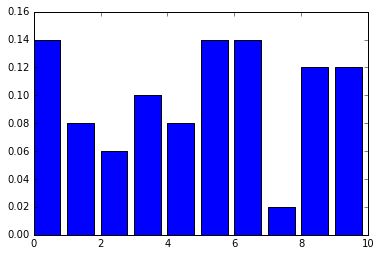

In [23]:
import matplotlib.pyplot as plt

print( p.keys() )
print( p.values() )

plt.bar(p.keys(), p.values())

# numpy.histogram()
* histogram() 함수: 시리즈 데이터의 히스토그램을 계산해 주는 함수.
* (hist, bins)을 반환, 히스토그램의 개수와 구간 배열 (각 구간을 cell 또는 bin 이라고 함)
* 반환되는 bins의 길이는 hist 개수 + 1

In [43]:
import numpy as np

# [0,20), 100개
data = np.random.randint(0, 20, size=100)

count, bins = np.histogram(data) # 기본 bins=10
print (count, bins)

[ 8 10  8  7 12 12  8  9 17  9] [  0.    1.9   3.8   5.7   7.6   9.5  11.4  13.3  15.2  17.1  19. ]


In [72]:
count, bins = np.histogram(data, bins=10)
print (count, bins)

[ 8 10  8  7 12 12  8  9 17  9] [  0.    1.9   3.8   5.7   7.6   9.5  11.4  13.3  15.2  17.1  19. ]


100


<Container object of 10 artists>

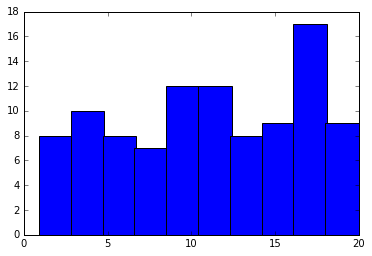

In [76]:
print (count.sum())
plt.bar(bins[1:], count, width=2, align='center')

# pandas_datareader


### pandas_datareader

```python
from pandas_datareader import data

df = data.get_data_yahoo("^KS11", datetime(2015, 1, 1), datetime(2015, 12, 30))
```

### 로그 수익률
```python
df['Ret'] = np.log( df['Adj Close'] / df ['Adj Close'].shift(1) )
```

In [107]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data

start = datetime(2015, 1, 1)
end = datetime(2015, 12, 30)
df = data.get_data_yahoo("^KS11", start, end)

df['Ret'] = np.log( df['Adj Close'] / df ['Adj Close'].shift(1) )
df['Ret'].head()

Date
2015-01-02         NaN
2015-01-05   -0.005565
2015-01-06   -0.017535
2015-01-07    0.000733
2015-01-08    0.010991
Name: Ret, dtype: float64

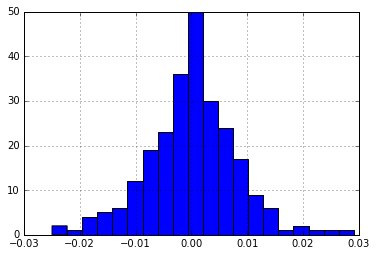

In [108]:
# 수익률(로그)의 분포를 히스토그램으로 그리기

df['Ret'].hist(bins=20, normed=False)

# DataFrame.describe()
* 자주 사용하는 통계 요약 값들을 반환
* 개수, 평균, 표준편차, 최소, 최대, 사분위 값
* 값을 각각 얻을 수 도 있다.

In [83]:
df['Ret'].describe()

count    250.000000
mean       0.000072
std        0.007954
min       -0.024967
25%       -0.004531
50%        0.000094
75%        0.004691
max        0.029124
Name: Ret, dtype: float64

# 정규분포

정규분포(Normal distribution, 가우스분포)
* 연속확률분포의 하나
* 수집된 자료의 분포를 근사하는데 자주 사용
* 2개의 매개 변수 평균 $\mu$ 과 표준편차 $\sigma$ 에 의해 모양 결정
* 분포를 $ N(\mu, \sigma^2) $ 으로 표기
* 표준정규분포: $\mu = 0$ 이고 $\sigma = 1 $ 인 정규분포 N(0,1)

# $ N(\mu, \sigma^2) $

평균 $\mu$ 와 표준편차 $\sigma$ 값에 따른 정규분포 $ N(\mu, \sigma^2) $ 모양
 
<img width="70%" src="https://goo.gl/MGOAJz" >
<br> https://en.wikipedia.org/wiki/Normal_distribution

실험이나 관찰을 통하여 수집된 자료의 확률분포는 대부분 정규분포와 유사한 모습을 나타내기 때문에, 정규분포(가우스 분포)는 자연과학 현상, 사회과학 현상을 분석할 때 가장 빈번하게 활용되는 확률분포이다.

# 주사위 던지기 시뮬레이션
주사위 n개를 던져 합을 구하는 시뮬레이션

In [99]:
# 1개의 주사위 던지기
print( np.random.randint(1, 7) )

# 3개의 주사위 던져 합 구하기
print( np.random.randint(1, 7, 3).sum() )

5
11


(array([   2.,    5.,   15.,   49.,   89.,  173.,  235.,  406.,  573.,
         711.,  812.,  926.,  994.,  996.,  954.,  871.,  697.,  531.,
         379.,  265.,  152.,   90.,   50.,   17.,    8.]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 25 Patch objects>)

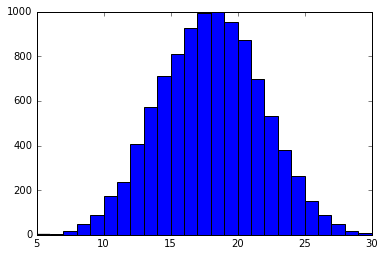

In [106]:
# 5개 주사위를 1만번 던져 합 구하기
throw_count = 10000 # throw count
dices = 5 # number of dices

data = []
for i in range(throw_count):
    data.append( np.random.randint(1, 7, dices).sum() )
bins = range(5, 31) # 2~30
plt.hist(data, bins)

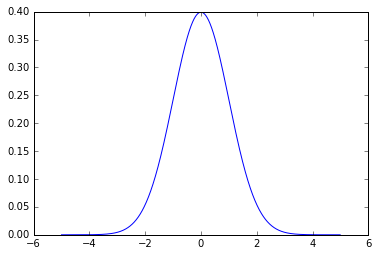

In [110]:
from scipy import stats

r = np.arange(-5, 5, 0.01)
mu, sigma = 0, 1
plt.plot(r, stats.norm.pdf(r, mu, sigma))

# scipy.stats
* norm.pdf(x, mu, sigma)
* norm.cdf(x, mu, sigma)

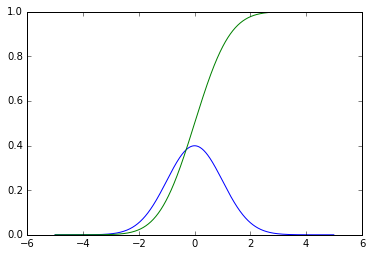

In [112]:
from scipy.stats import norm
x = np.arange(-5, 5, 0.01)
mu, sigma = 0, 1
plt.plot(x, norm.pdf(x, mu, sigma))
plt.plot(x, norm.cdf(x, mu, sigma))

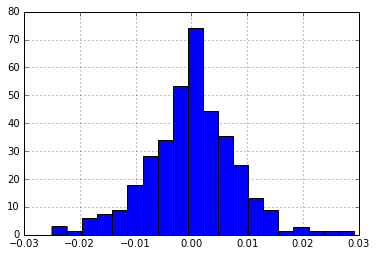

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

df['Ret'].hist(bins=20, normed=True)

# 리뷰
* 도수분표표 Frequency table, 히스토그램 Histogram
* numpy.histogram(data, bins)
* DataFrame.describe()
* 정규분포 (Normal distribution)
* scipy.stats 패키지 norm.pdf(), norm.cdf() 